In [70]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from dateutil.relativedelta import relativedelta

from utils import standardise_col_names, standardise_str_values, display_unique_object_values, display_null_summary

In [71]:
global_sales_df = pd.read_csv("./data/global_sales.csv")
global_sales_df = standardise_str_values(global_sales_df)
global_sales_df = standardise_col_names(global_sales_df)

<h1>EDA</h1>

<h2>Data Entry Checking</h2>

In [72]:
global_sales_df.head()

,ordernumber,quantityordered,priceeach,orderlinenumber,sales,orderdate,status,qtr_id,month_id,year_id,productline,msrp,productcode,customername,city,state,postalcode,country,dealsize
0,10107,30,95.70,2,2871.00,2/24/2003 0:00,SHIPPED,1,2,2003,MOTORCYCLES,95,S10_1678,LAND OF TOYS INC.,NYC,NY,10022,USA,SMALL
1,10121,34,81.35,5,2765.90,5/7/2003 0:00,SHIPPED,2,5,2003,MOTORCYCLES,95,S10_1678,REIMS COLLECTABLES,REIMS,NaN,51100,FRANCE,SMALL
2,10134,41,94.74,2,3884.34,7/1/2003 0:00,SHIPPED,3,7,2003,MOTORCYCLES,95,S10_1678,LYON SOUVENIERS,PARIS,NaN,75508,FRANCE,MEDIUM
3,10145,45,83.26,6,3746.70,8/25/2003 0:00,SHIPPED,3,8,2003,MOTORCYCLES,95,S10_1678,TOYS4GROWNUPS.COM,PASADENA,CA,90003,USA,MEDIUM
4,10159,49,100.00,14,5205.27,10/10/2003 0:00,SHIPPED,4,10,2003,MOTORCYCLES,95,S10_1678,CORPORATE GIFT IDEAS CO.,SAN FRANCISCO,CA,NaN,USA,MEDIUM


In [73]:
global_sales_df.tail()

,ordernumber,quantityordered,priceeach,orderlinenumber,sales,orderdate,status,qtr_id,month_id,year_id,productline,msrp,productcode,customername,city,state,postalcode,country,dealsize
2818,10350,20,100.00,15,2244.40,12/2/2004 0:00,SHIPPED,4,12,2004,SHIPS,54,S72_3212,EURO SHOPPING CHANNEL,MADRID,NaN,28034,SPAIN,SMALL
2819,10373,29,100.00,1,3978.51,1/31/2005 0:00,SHIPPED,1,1,2005,SHIPS,54,S72_3212,"OULU TOY SUPPLIES, INC.",OULU,NaN,90110,FINLAND,MEDIUM
2820,10386,43,100.00,4,5417.57,3/1/2005 0:00,RESOLVED,1,3,2005,SHIPS,54,S72_3212,EURO SHOPPING CHANNEL,MADRID,NaN,28034,SPAIN,MEDIUM
2821,10397,34,62.24,1,2116.16,3/28/2005 0:00,SHIPPED,1,3,2005,SHIPS,54,S72_3212,ALPHA COGNAC,TOULOUSE,NaN,31000,FRANCE,SMALL
2822,10414,47,65.52,9,3079.44,5/6/2005 0:00,ON HOLD,2,5,2005,SHIPS,54,S72_3212,GIFTS4ALLAGES.COM,BOSTON,MA,51003,USA,MEDIUM


In [74]:
global_sales_df.sample(n=5, random_state=42)

,ordernumber,quantityordered,priceeach,orderlinenumber,sales,orderdate,status,qtr_id,month_id,year_id,productline,msrp,productcode,customername,city,state,postalcode,country,dealsize
1091,10122,21,73.17,13,1536.57,5/8/2003 0:00,SHIPPED,2,5,2003,CLASSIC CARS,80,S18_3278,MARSEILLE MINI AUTOS,MARSEILLE,NaN,13008,FRANCE,SMALL
2328,10121,25,86.74,3,2168.50,5/7/2003 0:00,SHIPPED,2,5,2003,MOTORCYCLES,102,S32_4485,REIMS COLLECTABLES,REIMS,NaN,51100,FRANCE,SMALL
1474,10201,39,100.00,3,4351.23,12/1/2003 0:00,SHIPPED,4,12,2003,MOTORCYCLES,112,S24_1578,MINI WHEELS CO.,SAN FRANCISCO,CA,NaN,USA,MEDIUM
1437,10420,60,64.67,11,3880.20,5/29/2005 0:00,IN PROCESS,2,5,2005,CLASSIC CARS,73,S24_1046,SOUVENIERS AND THINGS CO.,CHATSWOOD,NSW,2067,AUSTRALIA,MEDIUM
1105,10287,43,70.76,15,3042.68,8/30/2004 0:00,SHIPPED,3,8,2004,CLASSIC CARS,80,S18_3278,"VIDA SPORT, LTD",GENSVE,NaN,1203,SWITZERLAND,MEDIUM


<h2>Shape of the dataset and Statistical Summary</h2>

In [75]:
global_sales_df.shape

(2823, 19)

In [76]:
global_sales_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2823 entries, 0 to 2822
Data columns (total 19 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ordernumber      2823 non-null   int64  
 1   quantityordered  2823 non-null   int64  
 2   priceeach        2823 non-null   float64
 3   orderlinenumber  2823 non-null   int64  
 4   sales            2823 non-null   float64
 5   orderdate        2823 non-null   object 
 6   status           2823 non-null   object 
 7   qtr_id           2823 non-null   int64  
 8   month_id         2823 non-null   int64  
 9   year_id          2823 non-null   int64  
 10  productline      2823 non-null   object 
 11  msrp             2823 non-null   int64  
 12  productcode      2823 non-null   object 
 13  customername     2823 non-null   object 
 14  city             2823 non-null   object 
 15  state            1337 non-null   object 
 16  postalcode       2747 non-null   object 
 17  country       

In [77]:
global_sales_df.describe()

,ordernumber,quantityordered,priceeach,orderlinenumber,sales,qtr_id,month_id,year_id,msrp
count,2823.000000,2823.000000,2823.000000,2823.000000,2823.000000,2823.000000,2823.000000,2823.00000,2823.000000
mean,10258.725115,35.092809,83.658544,6.466171,3553.889072,2.717676,7.092455,2003.81509,100.715551
std,92.085478,9.741443,20.174277,4.225841,1841.865106,1.203878,3.656633,0.69967,40.187912
min,10100.000000,6.000000,26.880000,1.000000,482.130000,1.000000,1.000000,2003.00000,33.000000
25%,10180.000000,27.000000,68.860000,3.000000,2203.430000,2.000000,4.000000,2003.00000,68.000000
50%,10262.000000,35.000000,95.700000,6.000000,3184.800000,3.000000,8.000000,2004.00000,99.000000
75%,10333.500000,43.000000,100.000000,9.000000,4508.000000,4.000000,11.000000,2004.00000,124.000000
max,10425.000000,97.000000,100.000000,18.000000,14082.800000,4.000000,12.000000,2005.00000,214.000000


**Total Records**: 2,823 rows

**Total Features**: 19 columns

**Time Span**: 2003 to 2005

**Maximum Sales Amount**: 14,802.80

**Highest Price per Item**: 100.00

In [78]:
display_null_summary(global_sales_df)

Null Value Summary:
            Null Count  Null Percentage (%)
state             1486                52.64
postalcode          76                 2.69


The summary showing that approximately **53%** of the **state data** and **3%** of **postal code** data are missing

<h2>Unique String Value</h2>

In [79]:
display_unique_object_values(global_sales_df)


Column: orderdate
Unique values (252):
['2/24/2003 0:00' '5/7/2003 0:00' '7/1/2003 0:00' '8/25/2003 0:00'
 '10/10/2003 0:00' '10/28/2003 0:00' '11/11/2003 0:00' '11/18/2003 0:00'
 '12/1/2003 0:00' '1/15/2004 0:00' '2/20/2004 0:00' '4/5/2004 0:00'
 '5/18/2004 0:00' '6/28/2004 0:00' '7/23/2004 0:00' '8/27/2004 0:00'
 '9/30/2004 0:00' '10/15/2004 0:00' '11/2/2004 0:00' '11/15/2004 0:00'
 '11/24/2004 0:00' '12/17/2004 0:00' '2/3/2005 0:00' '3/3/2005 0:00'
 '4/8/2005 0:00' '5/13/2005 0:00' '1/29/2003 0:00' '3/24/2003 0:00'
 '5/28/2003 0:00' '7/24/2003 0:00' '9/19/2003 0:00' '10/20/2003 0:00'
 '11/6/2003 0:00' '11/13/2003 0:00' '11/25/2003 0:00' '12/5/2003 0:00'
 '1/29/2004 0:00' '3/10/2004 0:00' '5/4/2004 0:00' '6/15/2004 0:00'
 '7/19/2004 0:00' '8/17/2004 0:00' '9/8/2004 0:00' '10/11/2004 0:00'
 '10/21/2004 0:00' '11/4/2004 0:00' '11/18/2004 0:00' '11/29/2004 0:00'
 '12/10/2004 0:00' '1/20/2005 0:00' '2/17/2005 0:00' '3/9/2005 0:00'
 '5/1/2005 0:00' '5/31/2005 0:00' '4/29/2003 0:00' '1/12

<h2>Numerical Value Distribution</h2>

Text(0.5, 1.0, 'MSRP Distribution')

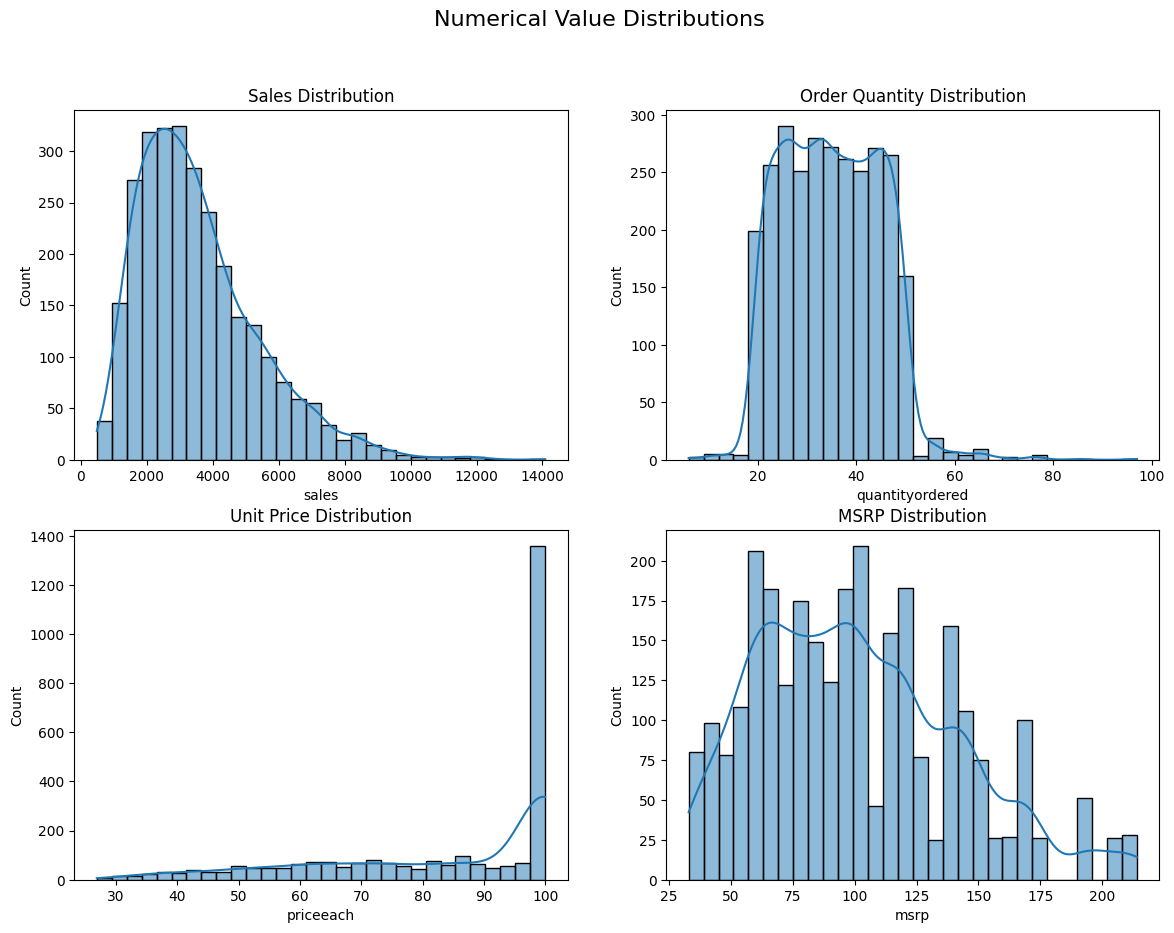

In [80]:
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
fig.suptitle("Numerical Value Distributions", fontsize=16)

sns.histplot(data=global_sales_df, x='sales', kde=True, bins=30, ax=axes[0, 0])
axes[0, 0].set_title('Sales Distribution')

sns.histplot(data=global_sales_df, x='quantityordered', kde=True, bins=30, ax=axes[0, 1])
axes[0, 1].set_title('Order Quantity Distribution')

sns.histplot(data=global_sales_df, x='priceeach', kde=True, bins=30, ax=axes[1, 0])
axes[1, 0].set_title('Unit Price Distribution')

sns.histplot(data=global_sales_df, x='msrp', kde=True, bins=30, ax=axes[1, 1])
axes[1, 1].set_title('MSRP Distribution')


**Sales**: Right-skewed distribution — most sales are below 5,000, with fewer high-value sales.

**Order Quantity**: Roughly bell-shaped — most orders are between 20 and 60 units.

**Unit Price (priceeach)**: Strong right spike at 100 — many items are priced at the maximum of 100.

**MSRP**: Fairly spread out with multiple peaks — values range from 30 to 200, no clear single mode.

<h2>Duplication Check</h2>

In [81]:
global_sales_df.duplicated().sum()

np.int64(0)

<h1>Transformation</h1>

<h2>Data format transformation</h2>

In [82]:
global_sales_df['orderdate'] = pd.to_datetime(global_sales_df['orderdate'])
global_sales_df = standardise_str_values(global_sales_df)
global_sales_df = standardise_col_names(global_sales_df)

Convert the orderdate to the type of datetime and standardise both string format and column name format to ease the process of analyzation.

In [83]:
state_city_pair = global_sales_df[['state', 'city']].drop_duplicates()
missing_state = state_city_pair[state_city_pair['state'].isna()]
cities_of_missing_state_lst = missing_state['city'].tolist()

In [84]:
state_city_pair[state_city_pair['city'].isin(cities_of_missing_state_lst)]['state'].notna().sum()

np.int64(0)

In [85]:
global_sales_df = global_sales_df.drop(columns='state')

Since state could not be reliably inferred from city, the column was dropped to preserve data quality.


In [86]:
city_postal_pair = global_sales_df[['city', 'postalcode']].drop_duplicates()
city_postal_pair

,city,postalcode
0,NYC,10022
1,REIMS,51100
2,PARIS,75508
3,PASADENA,90003
4,SAN FRANCISCO,NaN
...,...,...
481,BERGAMO,24100
483,GLEN WAVERLY,3150
554,GLENDALE,97561
567,MUNICH,80686


In [87]:
city_postal_pair['city'].nunique()

73

In [88]:
city_postal_pair[city_postal_pair['postalcode'].isna()]

,city,postalcode
4,SAN FRANCISCO,NaN
115,LOS ANGELES,NaN


Since the relationship between City and Postal Code is not one-to-one, City cannot reliably infer missing Postal Code values; however, Postal Code is retained as the missing rate is only ~3%, which is considered low and unlikely to significantly affect model performance or data integrity.

<h2>Data Engineering</h2>

In [89]:
global_sales_df['markup_discount'] = global_sales_df['priceeach'] - global_sales_df['msrp']
global_sales_df['total_markup_discount'] = global_sales_df['markup_discount']*global_sales_df['quantityordered']

In [90]:
def get_region(country):
    region_map = {
        "EUROPE": {
            'FRANCE', 'NORWAY', 'FINLAND', 'AUSTRIA', 'UK', 'SPAIN',
            'SWEDEN', 'ITALY', 'DENMARK', 'BELGIUM', 'GERMANY',
            'SWITZERLAND', 'IRELAND'
        },
        "ASIA": {
            'SINGAPORE', 'JAPAN', 'PHILIPPINES'
        },
        "OCEANIA": {
            'AUSTRALIA'
        },
        "NORTH AMERICA": {
            'USA', 'CANADA'
        }
    }


    for region, countries in region_map.items():
        if country in countries:
            return region
    return "Unknown"


In [91]:
global_sales_df['customer_region'] = global_sales_df['country'].apply(get_region)

In [92]:
global_sales_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2823 entries, 0 to 2822
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   ordernumber            2823 non-null   int64         
 1   quantityordered        2823 non-null   int64         
 2   priceeach              2823 non-null   float64       
 3   orderlinenumber        2823 non-null   int64         
 4   sales                  2823 non-null   float64       
 5   orderdate              2823 non-null   datetime64[ns]
 6   status                 2823 non-null   object        
 7   qtr_id                 2823 non-null   int64         
 8   month_id               2823 non-null   int64         
 9   year_id                2823 non-null   int64         
 10  productline            2823 non-null   object        
 11  msrp                   2823 non-null   int64         
 12  productcode            2823 non-null   object        
 13  cus

In [93]:
global_sales_df.describe()

,ordernumber,quantityordered,priceeach,orderlinenumber,sales,orderdate,qtr_id,month_id,year_id,msrp,markup_discount,total_markup_discount
count,2823.000000,2823.000000,2823.000000,2823.000000,2823.000000,2823,2823.000000,2823.000000,2823.00000,2823.000000,2823.000000,2823.000000
mean,10258.725115,35.092809,83.658544,6.466171,3553.889072,2004-05-11 00:16:49.989373056,2.717676,7.092455,2003.81509,100.715551,-17.057007,-604.482894
min,10100.000000,6.000000,26.880000,1.000000,482.130000,2003-01-06 00:00:00,1.000000,1.000000,2003.00000,33.000000,-154.640000,-7422.720000
25%,10180.000000,27.000000,68.860000,3.000000,2203.430000,2003-11-06 12:00:00,2.000000,4.000000,2003.00000,68.000000,-28.850000,-1008.000000
50%,10262.000000,35.000000,95.700000,6.000000,3184.800000,2004-06-15 00:00:00,3.000000,8.000000,2004.00000,99.000000,-9.000000,-292.330000
75%,10333.500000,43.000000,100.000000,9.000000,4508.000000,2004-11-17 12:00:00,4.000000,11.000000,2004.00000,124.000000,1.700000,54.500000
max,10425.000000,97.000000,100.000000,18.000000,14082.800000,2005-05-31 00:00:00,4.000000,12.000000,2005.00000,214.000000,67.000000,3216.000000
std,92.085478,9.741443,20.174277,4.225841,1841.865106,NaN,1.203878,3.656633,0.69967,40.187912,30.571804,1121.529222


<h1>Analysis</h1>

<h2>Time Based</h2>

<h3>Which month has the best sales?</h3>

In [94]:
sales_by_year_month = global_sales_df.groupby(by=['year_id', 'month_id'], as_index=False).agg(
    total_sales=('sales', 'sum'),
    average_sales_per_order=('sales', 'mean')
)
max_sales_rows = sales_by_year_month.loc[sales_by_year_month.groupby('year_id')['total_sales'].idxmax()]
print(max_sales_rows)

    year_id  month_id  total_sales  average_sales_per_order
10     2003        11   1029837.66              3479.181284
22     2004        11   1089048.01              3618.099701
28     2005         5    457861.06              3815.508833


### Key Observations:

Observing the sales trends from **2003 and 2004**, **November consistently recorded the highest sales**, indicating a strong year-end performance. However, since the **2005 data only runs up to May**, the **highest sales for 2005 occurred in May**, which aligns with its upward trend during the first half of the year.

<h3>Which year has the best sales?</h3>

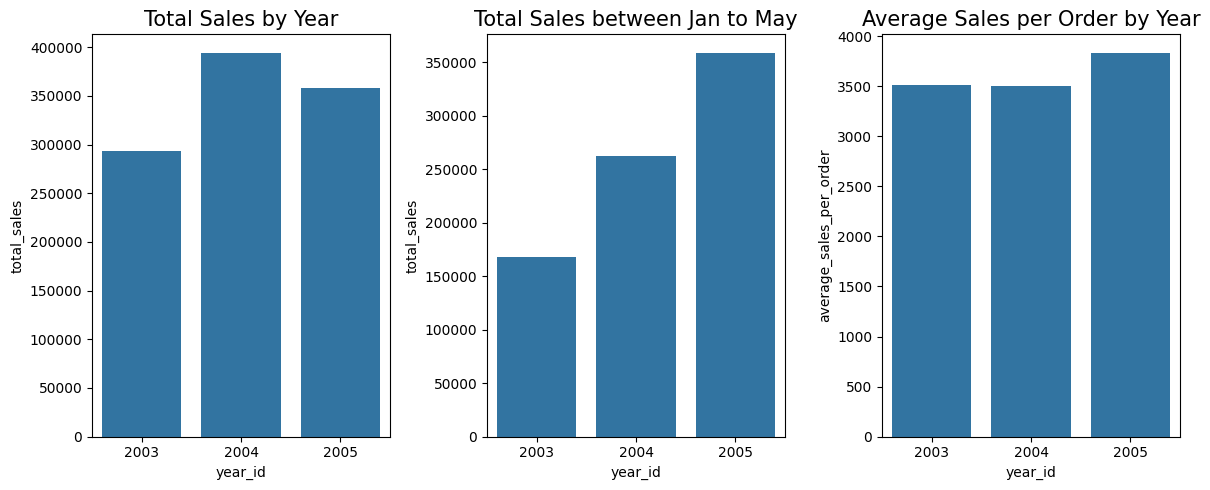

In [95]:
# creating three plots in a row
fig, (ax1,ax2,ax3) = plt.subplots(ncols=3, figsize=(12,5))

ax1 = sns.barplot(data=sales_by_year_month,
                  x='year_id',
                  y='total_sales',
                  errorbar=None, 
                  ax=ax1)
ax1.set_title('Total Sales by Year',size=15)

ax2 = sns.barplot(data=sales_by_year_month[sales_by_year_month['month_id'].isin(month for month in range(1, 6))],
                  x='year_id',
                  y='total_sales',
                  errorbar=None,
                  ax=ax2)
ax2.set_title('Total Sales between Jan to May',size=15)

ax3 = sns.barplot(data=sales_by_year_month,
                  x='year_id',
                  y='average_sales_per_order',
                  errorbar=None,
                  ax=ax3)
ax3.set_title('Average Sales per Order by Year',size=15)

plt.tight_layout()


### Key Observations:

While **2004** had the **best total sales**, **2005** had the highest sales from January to May and the highest average sales per order which showing a **stronger performance** in early-year sales and sales efficiency, suggesting **upward momentum**.

<h2>Region Based</h2>

<h3>Which country has the best sales?</h3>

In [96]:
total_sales_by_country = global_sales_df.groupby(by=['country'], as_index = False).agg(
    total_sales=('sales', 'sum'),
    total_customer=('customername', 'nunique'))
total_sales_by_country['average_customer_sales'] = total_sales_by_country['total_sales']/total_sales_by_country['total_customer']
total_sales_by_country

,country,total_sales,total_customer,average_customer_sales
0,AUSTRALIA,630623.10,5,126124.620000
1,AUSTRIA,202062.53,2,101031.265000
2,BELGIUM,108412.62,2,54206.310000
3,CANADA,224078.56,3,74692.853333
4,DENMARK,245637.15,2,122818.575000
5,FINLAND,329581.91,3,109860.636667
6,FRANCE,1110916.52,12,92576.376667
7,GERMANY,220472.09,3,73490.696667
8,IRELAND,57756.43,1,57756.430000
9,ITALY,374674.31,3,124891.436667


In [97]:
total_sales_by_country = total_sales_by_country.sort_values(by='total_sales', ascending=False)

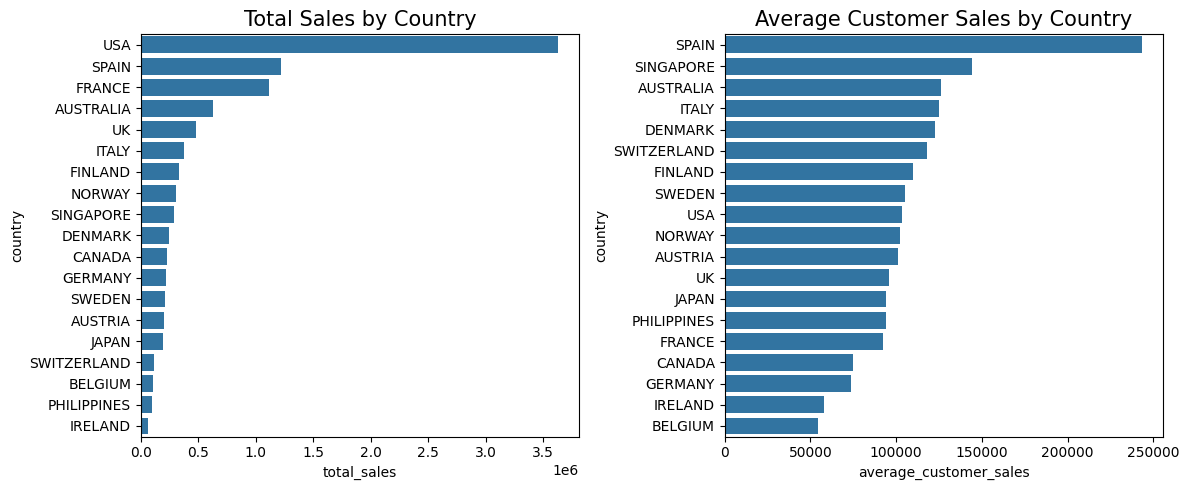

In [98]:
fig, (ax1,ax2) = plt.subplots(ncols=2, figsize=(12,5))

ax1 = sns.barplot(data=total_sales_by_country,x='total_sales',y='country',ax=ax1)
ax1.set_title('Total Sales by Country',size=15)

ax2 = sns.barplot(data=total_sales_by_country.sort_values(by='average_customer_sales', ascending=False),x='average_customer_sales',y='country',ax=ax2)
ax2.set_title('Average Customer Sales by Country',size=15)

plt.tight_layout()

The horizontal bar chart above showing the total sales by country and average customer sales by country:

* **USA** has the **highest total sales**, making it the top performer in absolute revenue.

* However, when looking at **average sales per customer**, **Spain** leads, indicating **fewer** but **higher-value** customers.

<h3>USA vs Spain</h3>

In [99]:
usa_sales = global_sales_df[global_sales_df['country']=='USA']
spain_sales = global_sales_df[global_sales_df['country']=='SPAIN']

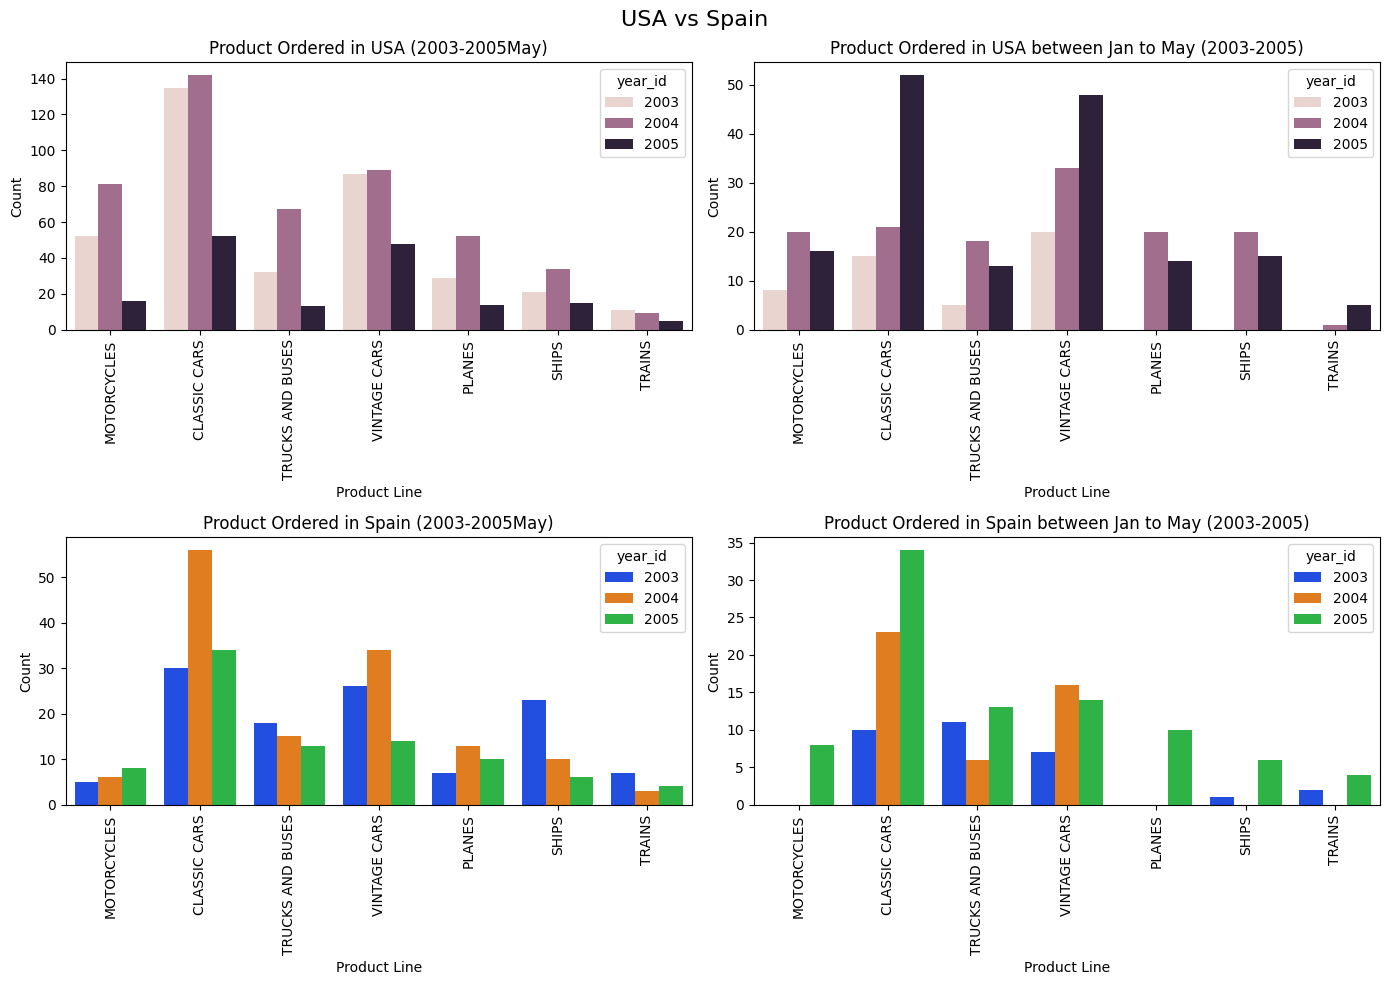

In [100]:
# Set up a 2x2 subplot grid
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
fig.suptitle("USA vs Spain", fontsize=16)

# Plot for USA
sns.countplot(data=usa_sales, x='productline', hue='year_id', ax=axes[0, 0])
axes[0, 0].set_title('Product Ordered in USA (2003-2005May)')
axes[0, 0].set_xlabel('Product Line')
axes[0, 0].set_ylabel('Count')
axes[0,0].tick_params(axis='x', rotation=90)

# Plot for USA (Jan to May)
sns.countplot(data=usa_sales[usa_sales['month_id'].isin([month for month in range(1, 6)])], 
                x='productline', hue='year_id', ax=axes[0, 1])
axes[0, 1].set_title('Product Ordered in USA between Jan to May (2003-2005)')
axes[0, 1].set_xlabel('Product Line')
axes[0, 1].set_ylabel('Count')
axes[0, 1].tick_params(axis='x', rotation=90)


# Plot for Spain
sns.countplot(data=spain_sales, x='productline', hue='year_id', palette='bright', ax=axes[1, 0])
axes[1, 0].set_title('Product Ordered in Spain (2003-2005May)')
axes[1, 0].set_xlabel('Product Line')
axes[1, 0].set_ylabel('Count')
axes[1,0].tick_params(axis='x', rotation=90)

# Plot for Spain (Jan to May)
sns.countplot(data=spain_sales[spain_sales['month_id'].isin([month for month in range(1, 6)])], 
                x='productline', hue='year_id', palette='bright', ax=axes[1, 1])
axes[1, 1].set_title('Product Ordered in Spain between Jan to May (2003-2005)')
axes[1, 1].set_xlabel('Product Line')
axes[1, 1].set_ylabel('Count')
axes[1, 1].tick_params(axis='x', rotation=90)


plt.tight_layout() 
plt.show()


The grouped bar chart above showing the amount of different product USA and Spain customer order in each year: 
* **USA** consistently ordered more products across all lines, especially **Classic Cars**, **Vintage Cars**, and **Motorcycles**, showing strong demand across years.
* **Classic Cars** were the top choice in both countries, but **USA had significantly higher volume**.
* In **early 2005 (Jan–May)**, USA saw a notable rise in **Classic Cars** and **Vintage Cars** orders, while Spain also showed growth, but at a smaller scale.
* **Spain** had fewer product orders overall, but showed **steady demand in Classic Cars and Vintage Cars**, especially in 2005.

### Key Observations:

**USA led in both volume and variety** of products ordered, while **Spain focused more heavily on high-value lines like Classic Cars**, aligning with its high **average sales per customer**.


<h3>Which region contributes the majority of customer sales?</h3>

In [101]:
total_sales_by_region = global_sales_df.groupby(by='customer_region', as_index=False).agg({'sales':'sum'})
total_sales_by_region

,customer_region,sales
0,ASIA,570671.95
1,EUROPE,4979272.41
2,NORTH AMERICA,3852061.39
3,OCEANIA,630623.10


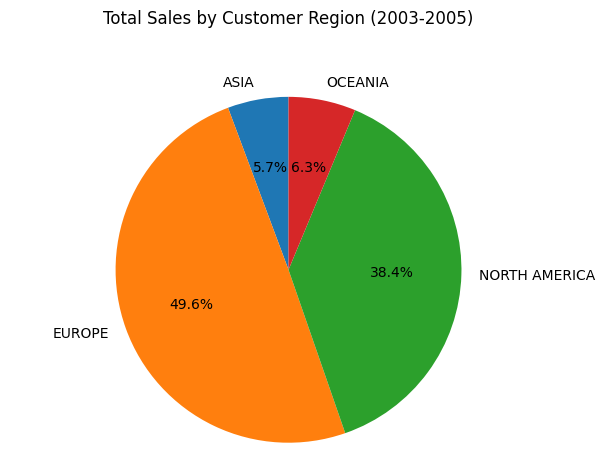

In [102]:
plt.pie(
    total_sales_by_region['sales'],         
    labels=total_sales_by_region['customer_region'].tolist(),  
    autopct='%1.1f%%',                             
    startangle=90                                  
)
plt.axis('equal') 
plt.title("Total Sales by Customer Region (2003-2005)", loc='center', pad=40)
plt.tight_layout()
plt.show()


The pie chart showing total sales by customer region:
* Sales were heavily concentrated in **Europe** and **North America**, accounting for nearly **90%** of total revenue during the period.

<h3>Which region tends to have more cancelled or problematic orders?</h3>

In [103]:
order_status = global_sales_df['status'].value_counts().reset_index()
order_status


,status,count
0,SHIPPED,2617
1,CANCELLED,60
2,RESOLVED,47
3,ON HOLD,44
4,IN PROCESS,41
5,DISPUTED,14


In [104]:
incomplete_order = order_status[~order_status['status'].isin(['SHIPPED', 'RESOLVED'])]
incomplete_order

,status,count
1,CANCELLED,60
3,ON HOLD,44
4,IN PROCESS,41
5,DISPUTED,14


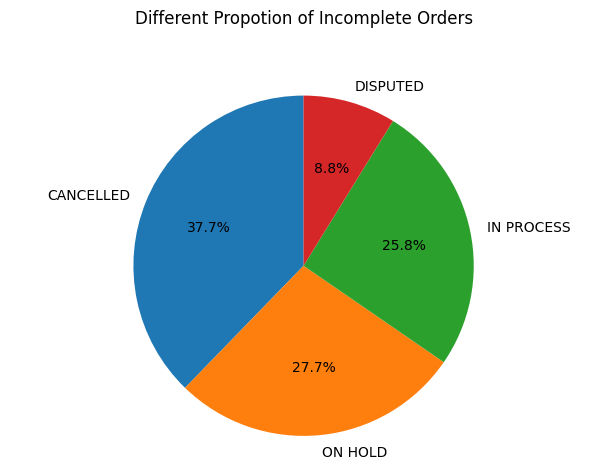

In [105]:
plt.pie(
    incomplete_order['count'],         
    labels=incomplete_order['status'].tolist(),  
    autopct='%1.1f%%',                             
    startangle=90                                  
)
plt.axis('equal')  # Optional: make it a perfect circle
plt.title("Different Propotion of Incomplete Orders", loc='center', pad=40)
plt.tight_layout()
plt.show()

The pie chart is showing proportion of incomplete orders:
* Among all incomplete orders, the majority are **Cancelled (37.7%)**, followed by **On Hold (27.7%)** and **In Process (25.8%)**.

In [106]:
cancel_count_by_country=global_sales_df[global_sales_df['status']=='CANCELLED'].groupby(by='country', as_index=False).agg(
    cancel_orders=('ordernumber', 'count')
)
total_order_by_country = global_sales_df.groupby(by='country', as_index=False).agg(
    total_order=('ordernumber', 'count')
)
cancel_count_by_country = cancel_count_by_country.merge(total_order_by_country, how='inner')
cancel_count_by_country['cancel_rate'] = cancel_count_by_country['cancel_orders']/cancel_count_by_country['total_order']*100
cancel_count_by_country = cancel_count_by_country.sort_values(by='cancel_rate')
cancel_count_by_country

,country,cancel_orders,total_order,cancel_rate
3,USA,14,1004,1.394422
0,SPAIN,16,342,4.678363
2,UK,14,144,9.722222
1,SWEDEN,16,57,28.070175


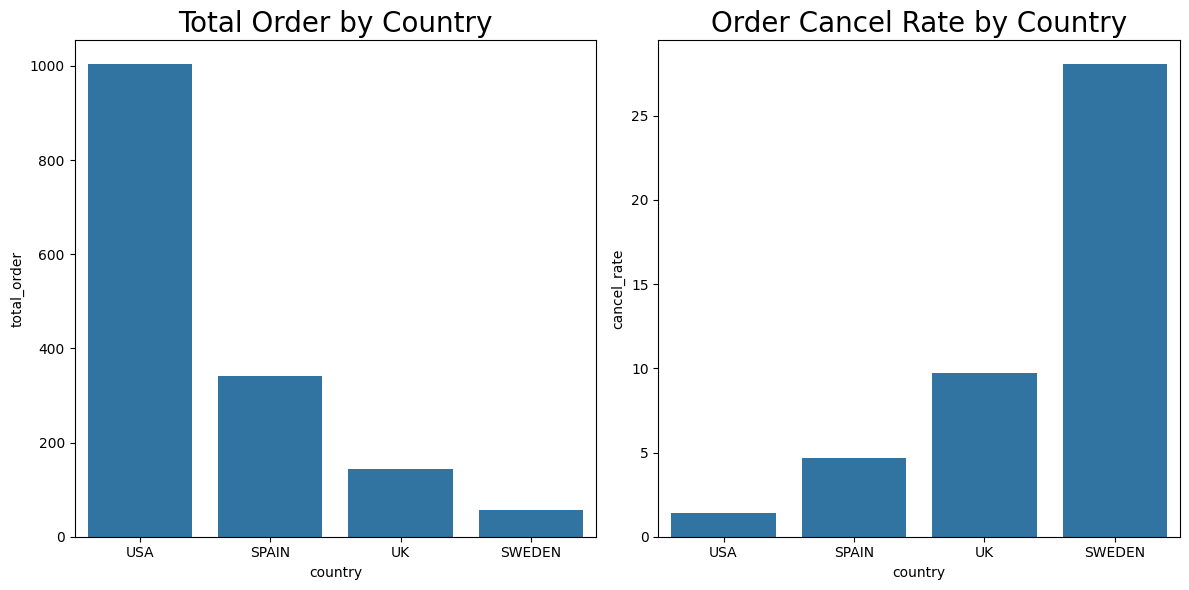

In [107]:
fig, (ax1,ax2) = plt.subplots(ncols=2, figsize=(12,6))

ax1 = sns.barplot(data=cancel_count_by_country, x='country', y='total_order',ax=ax1)
ax1.set_title('Total Order by Country', size=20)

ax2 = sns.barplot(data=cancel_count_by_country, x='country', y='cancel_rate',ax=ax2)
ax2.set_title('Order Cancel Rate by Country', size=20)

plt.tight_layout()

The two bar charts above are showing total order by country and order cancel rate by country:

* Looking at cancellation by country, although **USA** has the **highest total orders**, its **cancel rate** is the **lowest** among the listed countries.

* In contrast, **Sweden** has the smallest order volume but the **highest cancellation rate (over 28%)**, suggesting potential order fulfillment or customer satisfaction issues. 

### Key Observations:

**Sweden** has the **most problematic** order pattern, with the **highest** likelihood of **cancellations**, despite a relatively low total order count. This makes it a key area for further investigation.

<h2>Customer based</h2>

<h3>Who was the best customer?</h3>

In [108]:
customer_summary = global_sales_df.groupby("customername", as_index=False).agg(
    num_orders=("ordernumber", "nunique"),  
    total_sales=("sales", "sum"),
    total_markup_discount=('total_markup_discount', 'sum'),
    first_order_date=('orderdate', 'min'),      
    last_order_date=("orderdate", 'max')       
)

def calc_month_gap(row):
    diff = relativedelta(row['last_order_date'], row['first_order_date'])
    ret = diff.years * 12 + diff.months
    if ret == 0:
        return 1
    return ret


customer_summary['first_and_last_order_gap'] = customer_summary.apply(calc_month_gap, axis=1)
customer_summary['average_num_order_by_month'] = customer_summary['num_orders'] / customer_summary['first_and_last_order_gap']
customer_summary['average_sales_by_month'] = customer_summary['total_sales'] / customer_summary['first_and_last_order_gap']

In [109]:
customer_summary.head()

,customername,num_orders,total_sales,total_markup_discount,first_order_date,last_order_date,first_and_last_order_gap,average_num_order_by_month,average_sales_by_month
0,ALPHA COGNAC,3,70488.44,-8263.72,2003-07-04,2005-03-28,20,0.150000,3524.422000
1,AMICA MODELS & CO.,2,94117.26,-18646.99,2004-08-17,2004-09-09,1,2.000000,94117.260000
2,"ANNA'S DECORATIONS, LTD",4,153996.13,-31689.59,2003-09-11,2005-03-09,17,0.235294,9058.595882
3,ATELIER GRAPHIQUE,3,24179.96,-3790.84,2003-05-20,2004-11-25,18,0.166667,1343.331111
4,"AUSTRALIAN COLLECTABLES, LTD",3,64591.46,-6612.38,2003-11-21,2005-05-09,17,0.176471,3799.497647


In [110]:
customer_summary.tail()

,customername,num_orders,total_sales,total_markup_discount,first_order_date,last_order_date,first_and_last_order_gap,average_num_order_by_month,average_sales_by_month
87,"UK COLLECTABLES, LTD.",3,118008.27,-26847.41,2003-10-06,2005-04-08,18,0.166667,6556.015000
88,"VIDA SPORT, LTD",2,117713.56,-28537.09,2004-02-22,2004-08-30,6,0.333333,19618.926667
89,VITACHROME INC.,3,88041.26,-14552.63,2003-01-10,2004-11-05,21,0.142857,4192.440952
90,"VOLVO MODEL REPLICAS, CO",4,75754.88,-15012.79,2003-03-24,2004-11-19,19,0.210526,3987.098947
91,WEST COAST COLLECTABLES CO.,2,46084.64,-6586.77,2003-12-01,2004-01-29,1,2.000000,46084.640000


<h4>Revenue Focused</h4>

In [111]:
customer_summary = customer_summary.sort_values(by='total_sales', ascending=False)

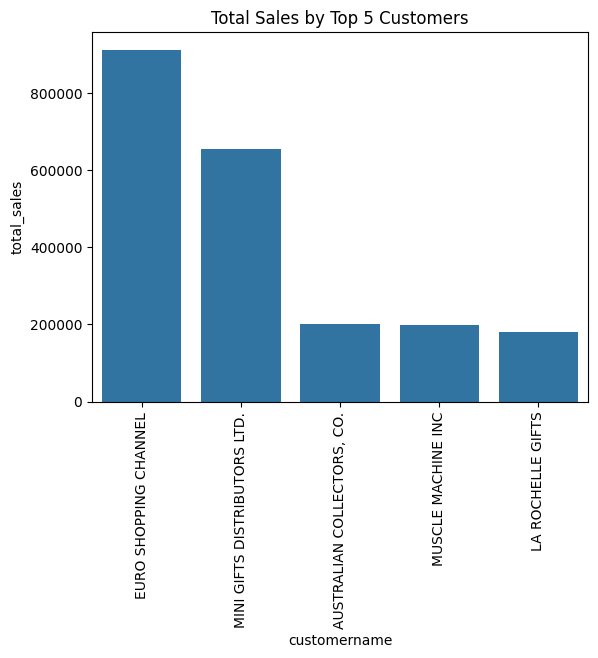

In [112]:
sns.barplot(data=customer_summary.head(), x='customername', y='total_sales')
plt.title("Total Sales by Top 5 Customers")
plt.tick_params(axis='x', rotation=90)

This bar chart highlights the top 5 customers by total sales volume:
* **EURO SHOPPING CHANNEL** stands out with the **highest total sales**, exceeding 900,000.
* **MINI GIFTS DISTRIBUTORS LTD.** follows in second place with approximately 650,000 in total sales.
* The remaining three customers — **AUSTRALIAN COLLECTORS, CO.**, **MUSCLE MACHINE INC**, and **LA ROCHELLE GIFTS** — each contributed around 200,000 in total sales.
* **EURO SHOPPING CHANNEL** is the top contributor in terms of **total revenue**, making it the most valuable customer from a sales volume perspective.


<h4>Effiecientcy Focused</h4>

In [113]:
customer_summary = customer_summary.sort_values(by='average_sales_by_month', ascending=False)

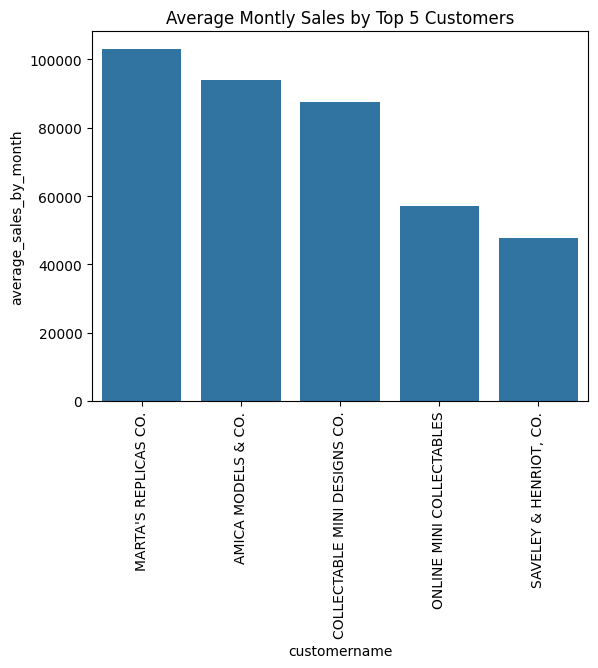

In [114]:
sns.barplot(data=customer_summary.head(), x='customername', y='average_sales_by_month')
plt.title("Average Montly Sales by Top 5 Customers")
plt.tick_params(axis='x', rotation=90)

This bar chart shows the average monthly sales for the top 5 customers:

* **MARTAS REPLICAS CO.** leads with over **100,000** in **monthly sales**, making it the **most profitable** customer by **monthly revenue**.

* **AMICA MODELS & CO.** and **COLLECTABLE MINI DESIGNS CO.** follow closely with strong and steady monthly contributions.

* **ONLINE MINI COLLECTABLES** and **SAVELEY & HENRIOT, CO.** round out the top 5, contributing significantly but at a lower scale.

* **MARTAS REPLICAS CO.** is the top customer in terms of revenue generation per month, making them the most valuable from a sales performance standpoint

<h4>Loyalty Focused</h4>

In [115]:
customer_summary = customer_summary.sort_values(by=['first_and_last_order_gap', 'average_num_order_by_month'], ascending=False)

In [116]:
customer_summary.head()

,customername,num_orders,total_sales,total_markup_discount,first_order_date,last_order_date,first_and_last_order_gap,average_num_order_by_month,average_sales_by_month
33,EURO SHOPPING CHANNEL,26,912294.11,-142279.95,2003-01-31,2005-05-31,28,0.928571,32581.932500
56,MINI GIFTS DISTRIBUTORS LTD.,17,654858.06,-121115.81,2003-03-26,2005-05-29,26,0.653846,25186.848462
27,DANISH WHOLESALE IMPORTS,5,145041.60,-28135.16,2003-02-11,2005-04-15,26,0.192308,5578.523077
71,SALZBURG COLLECTABLES,4,149798.63,-27218.15,2003-04-28,2005-05-17,24,0.166667,6241.609583
31,"DRAGON SOUVENIERS, LTD.",5,172989.68,-42316.05,2003-04-16,2005-03-02,22,0.227273,7863.167273


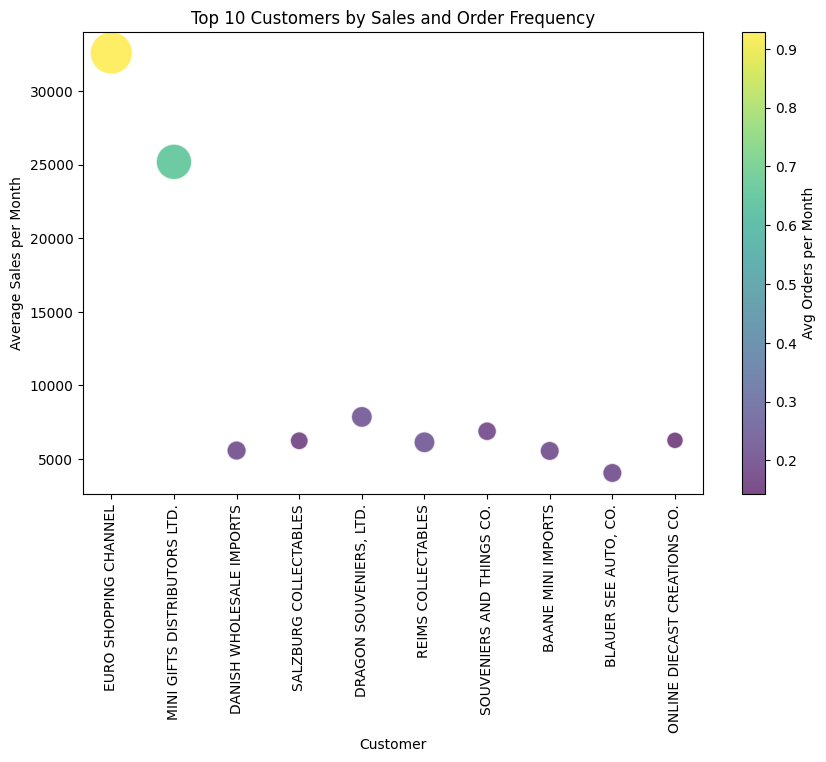

In [117]:
top_10_customer_summary = customer_summary.head(10)

plt.figure(figsize=(10,6))
scatter = plt.scatter(
    x=top_10_customer_summary['customername'],
    y=top_10_customer_summary['average_sales_by_month'],
    s=top_10_customer_summary['average_num_order_by_month'] * 1000,
    c=top_10_customer_summary['average_num_order_by_month'],
    cmap='viridis',
    alpha=0.7,
    edgecolors='w'
)
plt.title("Top 10 Customers by Sales and Order Frequency")
plt.xlabel('Customer')
plt.ylabel('Average Sales per Month')
plt.colorbar(scatter, label='Avg Orders per Month')
plt.tick_params(axis='x', rotation=90)



The bubble plot is showing top 10 customery sales and prder :
* **EURO SHOPPING CHANNEL** clearly stands out with the highest average sales per month and the largest bubble size and brightest color, indicating the highest average order frequency (~0.93 orders/month).

* **MINI GIFTS DISTRIBUTORS LTD.** follows with strong sales and a relatively high order rate (~0.65/month), but still lags behind in both volume and frequency compared to EURO SHOPPING CHANNEL.

* **EURO SHOPPING CHANNEL** is the **most loyal and valuable customer** — combining high purchase volume with frequent and consistent ordering behavior.

<h3>Does offering discounts lead to increased sales?</h3>

In [118]:
discounted_order = global_sales_df[global_sales_df['markup_discount'] < 0]
markup_or_no_discount = global_sales_df[global_sales_df['markup_discount'] >= 0]

Text(0.5, 1.0, 'Sales Distribution: Discounted vs Non-Discounted Orders')

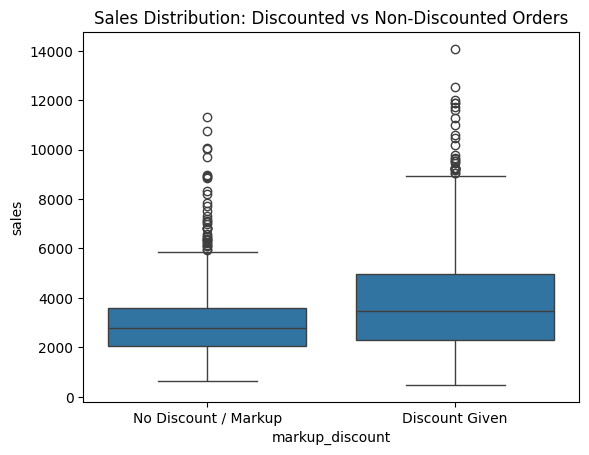

In [119]:
sns.boxplot(data=global_sales_df, x=(global_sales_df['markup_discount'] < 0), y='sales')
plt.xticks([0,1], ['No Discount / Markup', 'Discount Given'])
plt.title('Sales Distribution: Discounted vs Non-Discounted Orders')

This boxplot compares the sales distribution between discounted and non-discounted orders.


* **Orders with a discount** generally have a **higher median sales value** compared to those without.

* The interquartile range **(IQR)** for **discounted orders** is **wider**, suggesting more variability in sales amounts.

* **Outliers** are **more frequent and higher** for discounted orders, indicating that **large purchases** are **more likely when discounts are offered**.

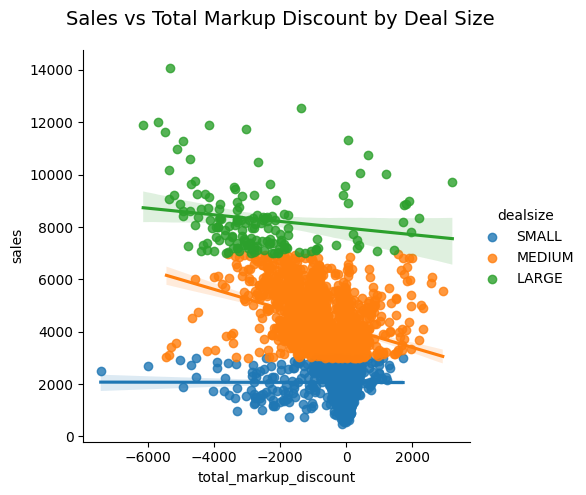

In [120]:
ax = sns.lmplot(data=global_sales_df, x='total_markup_discount', y='sales', hue='dealsize')
ax.fig.suptitle("Sales vs Total Markup Discount by Deal Size", fontsize=14)
ax.fig.subplots_adjust(top=0.90)  

This chart visualizes how **total markup** (price adjustment) impacts **sales**, broken down by deal size:

* **Large deals (green)**:

  * These generate the **highest sales overall**, regardless of markup.
  * The **slightly negative slope** suggests that **adding markup doesn't hurt sales much**, and giving **discounts doesn't necessarily increase sales** — customers may be committed due to volume or negotiated contracts.

* **Medium deals (orange)**:

  * Show a **clear negative trend** — **higher markups reduce sales**, while **discounts slightly help**.
  * This implies **medium-sized buyers are more price-sensitive** and may respond better to modest discounts.

* **Small deals (blue)**:

  * Show **minimal correlation** — sales stay relatively stable across markup levels.
  * Discounts or markups **do not significantly influence** small deal sales, possibly due to limited volumes or one-time purchases.

* **Higher markups tend to reduce sales**, especially for **medium-sized deals**.
* **Discounts may improve sales modestly** for medium deals, but not dramatically.
* **Large deals perform well regardless of price adjustment**, indicating **strong baseline demand**.
* **Small deals remain mostly unaffected**, suggesting **discounting may not be necessary** for that segment.

### Key Observations:

**Pricing strategy should be tailored by deal size** — avoid over-discounting large deals, and consider modest incentives for medium ones.


<h2>Product based</h2>

<h3>Which quarter is the best for each product line?</h3>


In [126]:
global_sales_df.columns

Index(['ordernumber', 'quantityordered', 'priceeach', 'orderlinenumber',
       'sales', 'orderdate', 'status', 'qtr_id', 'month_id', 'year_id',
       'productline', 'msrp', 'productcode', 'customername', 'city',
       'postalcode', 'country', 'dealsize', 'markup_discount',
       'total_markup_discount', 'customer_region', 'is_discounted'],
      dtype='object')

In [127]:
product_line_by_year_quarter = global_sales_df.groupby(by=['year_id', 'qtr_id', 'productline'], as_index=False).agg(
    total_sales=('sales', 'sum'),
    total_order_quantity=('quantityordered', 'sum')
)

In [128]:
product_line_by_year_quarter

,year_id,qtr_id,productline,total_sales,total_order_quantity
0,2003,1,CLASSIC CARS,166682.87,1383
1,2003,1,MOTORCYCLES,38422.91,399
2,2003,1,PLANES,39205.31,460
3,2003,1,SHIPS,27050.38,301
4,2003,1,TRAINS,9263.65,119
...,...,...,...,...,...
65,2005,2,PLANES,78036.44,879
66,2005,2,SHIPS,33019.01,379
67,2005,2,TRAINS,10257.87,123
68,2005,2,TRUCKS AND BUSES,89726.28,832


In [129]:
best_quarter_per_productline = product_line_by_year_quarter.loc[
    product_line_by_year_quarter.groupby('productline')['total_sales'].idxmax()
].reset_index(drop=True)

In [130]:
best_quarter_per_productline

,year_id,qtr_id,productline,total_sales,total_order_quantity
0,2003,4,CLASSIC CARS,829663.49,7110
1,2004,4,MOTORCYCLES,211972.80,2098
2,2004,4,PLANES,220104.39,2396
3,2004,4,SHIPS,131792.16,1579
4,2004,4,TRAINS,58090.99,552
5,2004,4,TRUCKS AND BUSES,261262.39,2371
6,2004,4,VINTAGE CARS,433766.11,4508


From this breakdown, **Q4** consistently appears to be the strongest quarter for product sales across different lines.

Moreover, based on the previous analysis of total and partial-year sales trends, **Q4 of 2005 (if complete data were available)** could potentially be the **strongest quarter** of all, especially considering the upward momentum in early 2005. This suggests seasonal strength in Q4 and highlights 2005-Q4 as a key opportunity window for sales performance.

<h3>What product sold the most?</h3>


In [131]:
ordered_quantity_by_product = product_line_by_year_quarter.groupby(by='productline', as_index=False).agg(
    total_num_ordered=('total_order_quantity', 'sum')
    )
ordered_quantity_by_product = ordered_quantity_by_product.sort_values(by='total_num_ordered').reset_index(drop=True)

In [132]:
ordered_quantity_by_product

,productline,total_num_ordered
0,TRAINS,2712
1,SHIPS,8127
2,PLANES,10727
3,TRUCKS AND BUSES,10777
4,MOTORCYCLES,11663
5,VINTAGE CARS,21069
6,CLASSIC CARS,33992


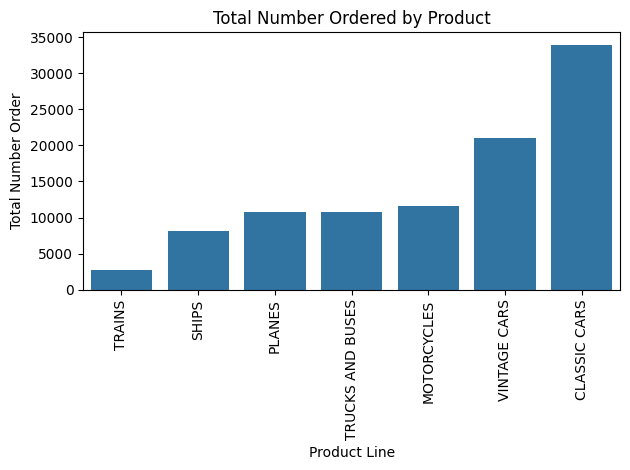

In [133]:
sns.barplot(data=ordered_quantity_by_product, x='productline', y='total_num_ordered')
plt.tick_params(axis='x', rotation=90)
plt.title('Total Number Ordered by Product')
plt.xlabel('Product Line')
plt.ylabel('Total Number Order')
plt.tight_layout()

The bar chart shows the **total number of units ordered** for each product line.

#### Key observations:

* **Classic Cars** is the clear leader, with the **highest total order volume**, surpassing **34,000 units**.
* **Vintage Cars** ranks second, with over **21,000 units ordered**.
* **Motorcycles**, **Trucks and Buses**, and **Planes** follow closely, each with similar total order quantities around **11,000 to 12,000 units**.
* **Ships** and **Trains** have the **lowest order volumes**, with **Trains** being the least ordered product line.

<h2>Conclusion</h2>

The analysis reveals clear **product, customer, regional, seasonal, and pricing** trends that provide actionable insights for strategy optimization:

* **Classic Cars** consistently dominate both in **order volume** and **revenue**, confirming their broad market appeal and status as the most commercially valuable product line. **Vintage Cars** follow closely, reinforcing their position as a core offering.

* **Planes** and **Ships**, while not leading in volume, contribute significantly to **revenue through premium pricing**, suggesting an opportunity to further develop high-margin segments.

* **Q4** stands out as the **strongest sales period**, with **November** consistently recording the highest monthly sales. Early 2005 trends suggest **Q4 2005 could have been the best quarter** had full data been available — reinforcing the importance of **seasonal alignment** in campaign planning.

* **USA** leads in **total sales and order volume**, especially for high-demand lines like Classic and Vintage Cars. In contrast, **Spain**, despite fewer orders, records the **highest average sales per customer**, indicating a high-value market segment.

* **EURO SHOPPING CHANNEL** emerges as the **most valuable and loyal customer**, leading in both **total sales** and **order frequency**, while **MARTAS REPLICAS CO.** tops **monthly revenue**, underscoring the need for differentiated retention strategies.

* Pricing analysis shows **discounts are most effective for medium-sized deals**, whereas **large deals remain resilient to price changes** — pointing to the need for **deal-size-specific pricing strategies**.

* Finally, **Sweden** exhibits a **high cancellation rate** despite low order volume, suggesting operational or satisfaction issues that warrant further investigation.

These findings support a targeted approach: **reinforce strengths in high-performing products and regions, refine pricing by deal size, focus on premium positioning for niche products**, and **leverage seasonal trends for maximum impact**.
